<a href="https://colab.research.google.com/github/anasabbad/Bike-Sharing-Demand-Prediction--Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing Libraries and Loading the data set**

In [321]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [322]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [323]:
#loading the data
data= pd.read_csv('/content/drive/MyDrive/Capstone Projects/BikeSharingDemandPrediction_Capstone/SeoulBikeData (1).csv').replace([np.inf, -np.inf], np.nan)

In [324]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [326]:
data.shape

(8760, 14)

In [327]:
#renaming the column names
data.rename(columns = {'Rented Bike Count':'Rented_Bike_Count'}, inplace = True)
data.rename(columns = {'Rainfall(mm)':'Rainfall'}, inplace = True)
data.rename(columns = {'Temperature(°C)':'Temperature'}, inplace = True)
data.rename(columns = {'Humidity(%)':'Humidity'}, inplace = True)
data.rename(columns = {'Wind speed (m/s)':'Wind_Speed'}, inplace = True)
data.rename(columns = {'Visibility (10m)':'Visibility'}, inplace = True)
data.rename(columns = {'Solar Radiation (MJ/m2)':'Solar_Radiation'}, inplace = True)
data.rename(columns = {'Snowfall (cm)':'Snowfall'}, inplace = True)

In [328]:
# total count of missing values column wise
data.isnull().sum()

Date                         0
Rented_Bike_Count            0
Hour                         0
Temperature                  0
Humidity                     0
Wind_Speed                   0
Visibility                   0
Dew point temperature(°C)    0
Solar_Radiation              0
Rainfall                     0
Snowfall                     0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

We can see that there are no missing values.

In [329]:
data.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew point temperature(°C),Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [330]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 4 categorical variables


In [331]:
# Adding a new column for Month in the dataFrame
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented_Bike_Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature                8760 non-null   float64
 4   Humidity                   8760 non-null   int64  
 5   Wind_Speed                 8760 non-null   float64
 6   Visibility                 8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar_Radiation            8760 non-null   float64
 9   Rainfall                   8760 non-null   float64
 10  Snowfall                   8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# **Handling Outliers**

<Figure size 504x504 with 0 Axes>

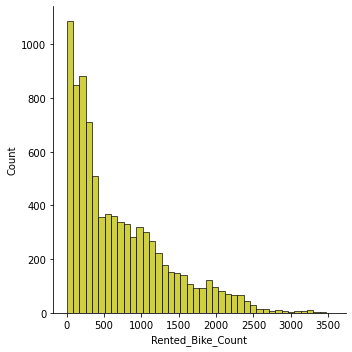

In [333]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.displot(data['Rented_Bike_Count'],color="y")

In [334]:
# Replace infinite updated data with nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
data.dropna(inplace=True)


In [335]:
def round_int(x):
    if x in [float("-inf"),float("inf")]: return float("nan")
    return int(round(x))
data['Rented_Bike_Count'] = data['Rented_Bike_Count'].apply(round_int)

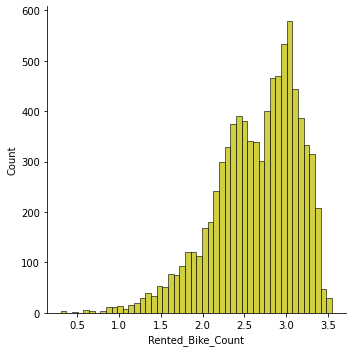

In [336]:

ax=sns.displot(np.log10(data['Rented_Bike_Count']), color="y")
plt.show()

In [337]:
data['Rented_Bike_Count_log'] = np.log2(data['Rented_Bike_Count'])

In [338]:
data['Rented_Bike_Count_log'] .describe()

count    8760.000000
mean            -inf
std              NaN
min             -inf
25%         7.577429
50%         8.978710
75%        10.056976
max        11.796040
Name: Rented_Bike_Count_log, dtype: float64

So it is better to do a Square Root Transform to avoid the infinity values

In [339]:
data=data.drop('Rented_Bike_Count_log', axis=1)

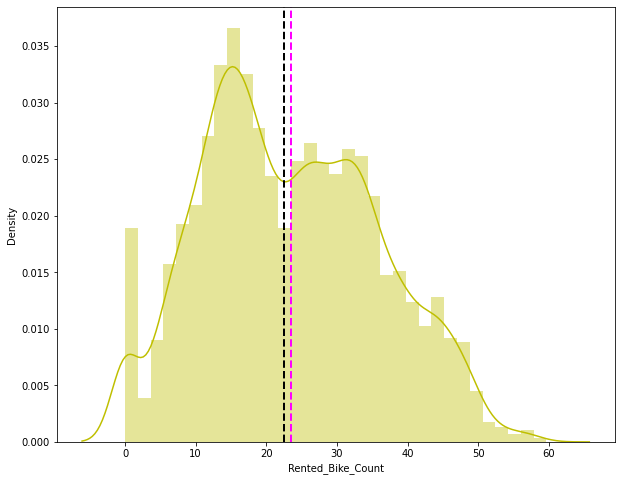

In [340]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(data['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(data['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(data['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

The distribution is much better now. So we can trsnform the Rented_Bike_Count using Square Root Transform

In [341]:
data['Rented_Bike_Count'] = np.sqrt(data['Rented_Bike_Count'])

# **Exploratory Data Analysis & Data Preparation**

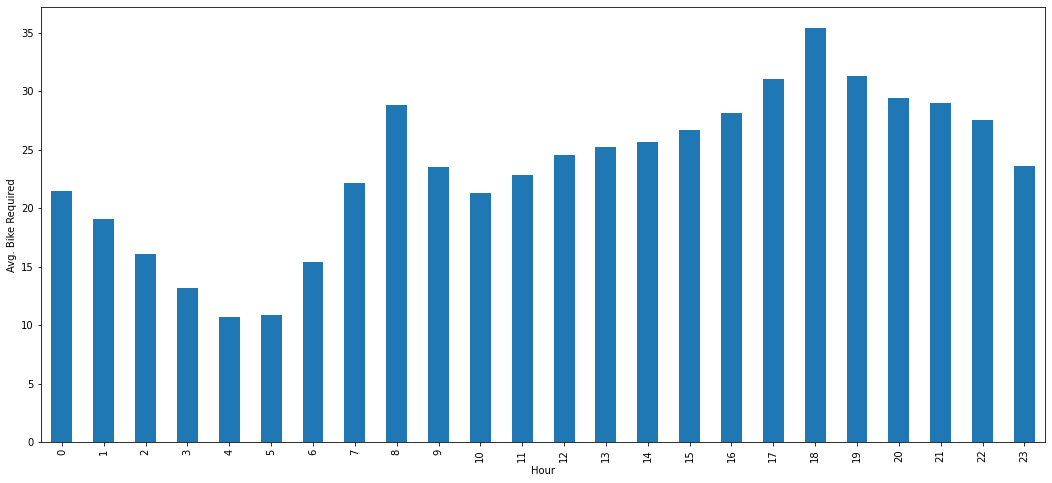

In [342]:
data.groupby('Hour').Rented_Bike_Count.mean().plot(kind='bar',figsize=(18,8))
plt.ylabel('Avg. Bike Required')
plt.show()

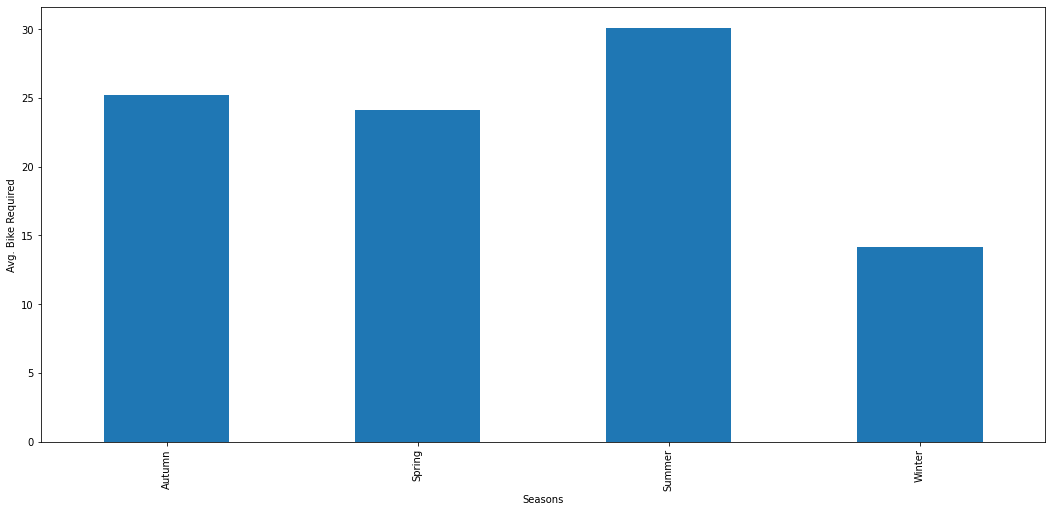

In [343]:
data.groupby('Seasons').Rented_Bike_Count.mean().plot(kind='bar',figsize=(18,8))
plt.ylabel('Avg. Bike Required')
plt.show()

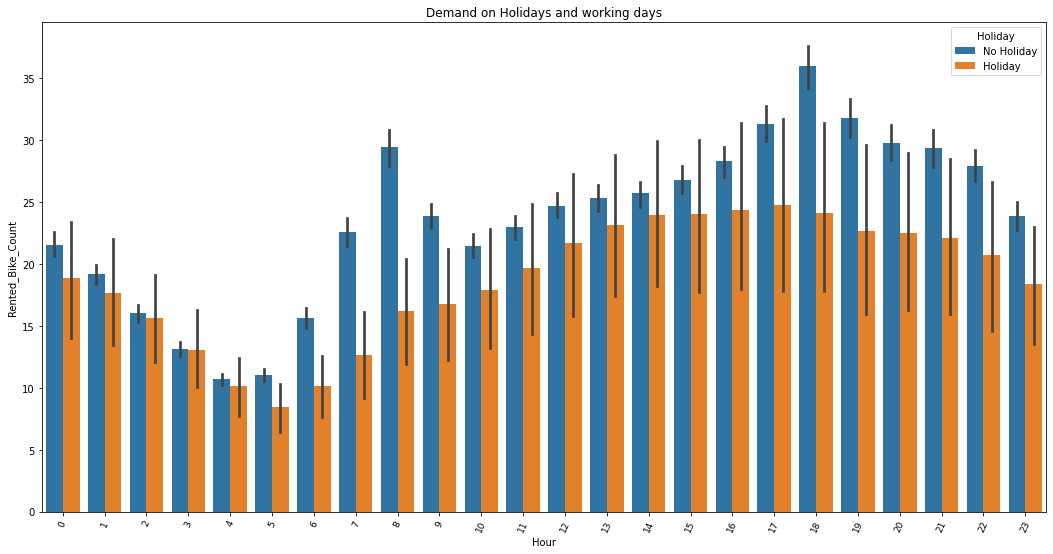

In [344]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Hour")
plt.ylabel("Rented_Bike_Count")
plt.title("Demand on Holidays and working days")
sns.barplot('Hour', 'Rented_Bike_Count', hue='Holiday', data=data);
plt.show()

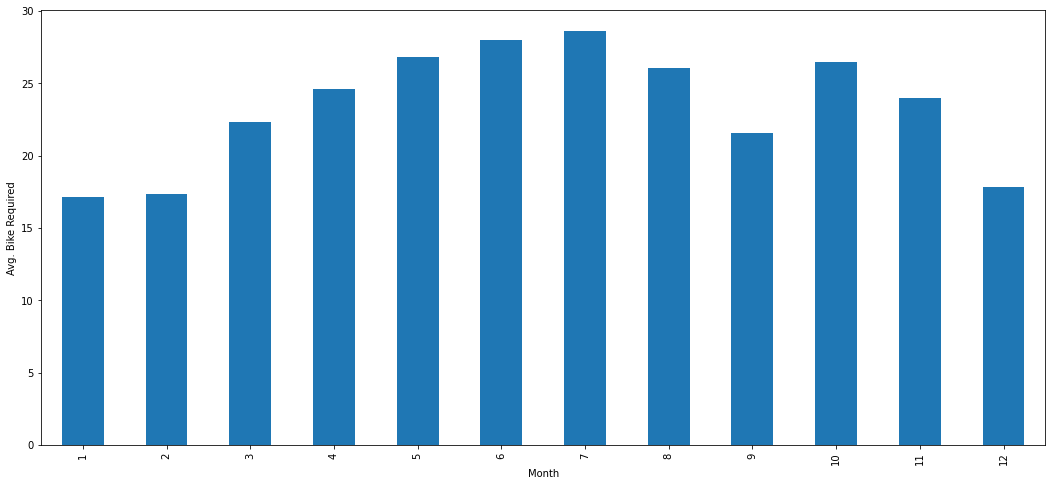

In [345]:
data.groupby('Month').Rented_Bike_Count.mean().plot(kind='bar',figsize=(18,8))
plt.ylabel('Avg. Bike Required')
plt.show()

**Infrenece:**


* The peak requirement for bikes are during the start and end of office hours
* The Bikes are most used in Summers and Least used during winters
*On holidays the demand is not that as much as that on Working days. But the trend of demand more or less remains the same
*The Demand for bikes are less during the start and end of the year and the demand grows till June and then shows a decrfeasing trend

In [346]:
numeric_features = data.describe().columns
numeric_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_Speed',
       'Visibility', 'Dew point temperature(°C)', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Month'],
      dtype='object')

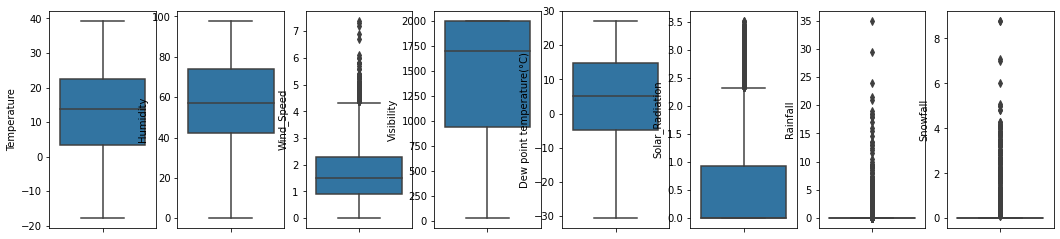

In [347]:
 #Draw box plots for indepent variables with continuous values
cont_features=['Temperature', 'Humidity',
       'Wind_Speed', 'Visibility', 'Dew point temperature(°C)',
       'Solar_Radiation', 'Rainfall', 'Snowfall']
plt.figure(figsize=(18,4))

i = 1
for col in cont_features:
    plt.subplot(1,8,i)
    sns.boxplot(y=col, data=data)
    i+=1

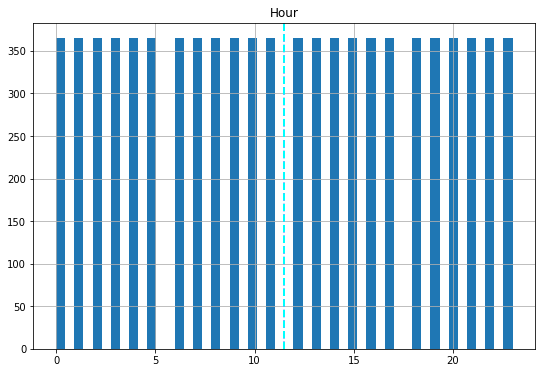

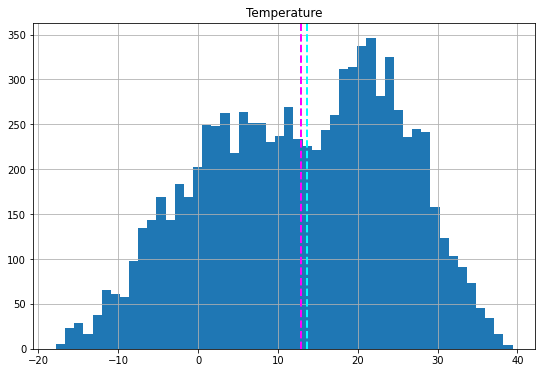

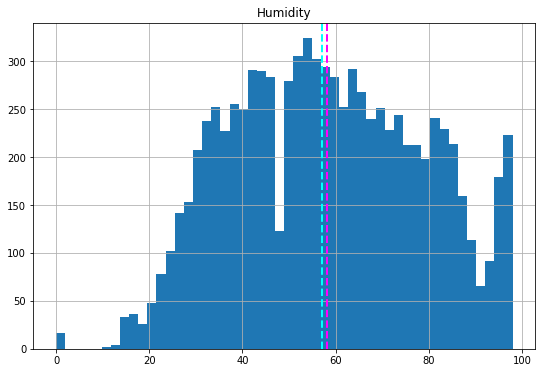

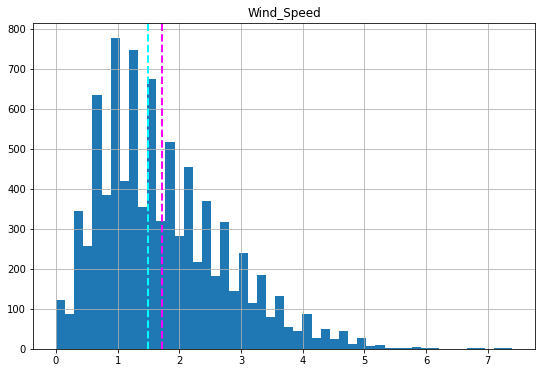

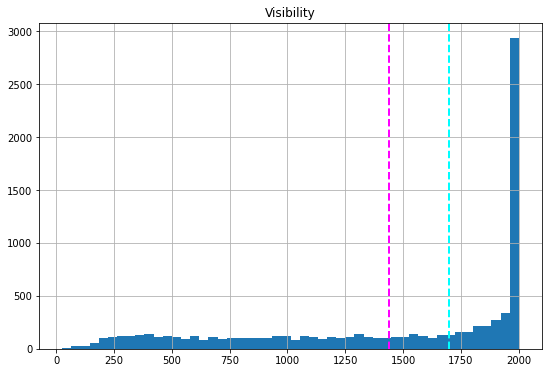

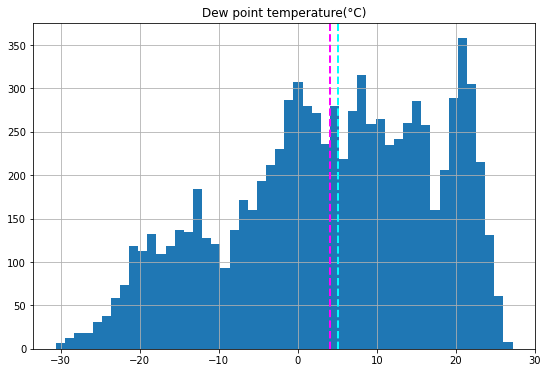

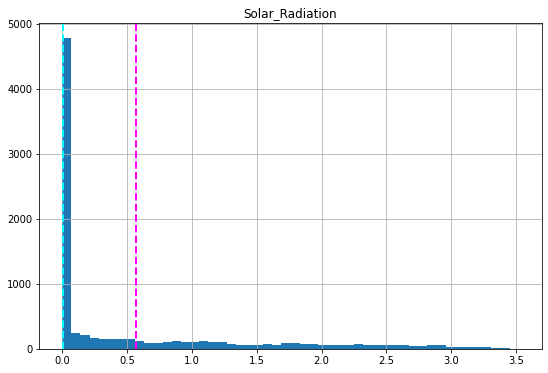

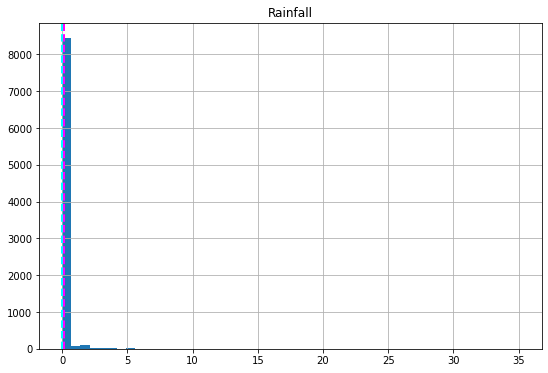

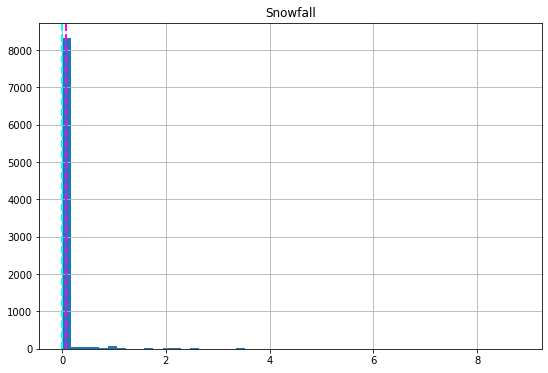

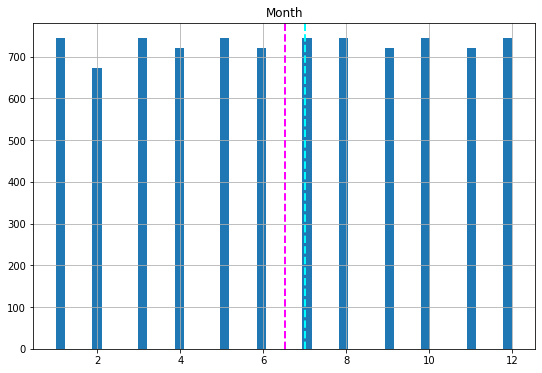

In [348]:
# plot a bar plot for each numerical feature count

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

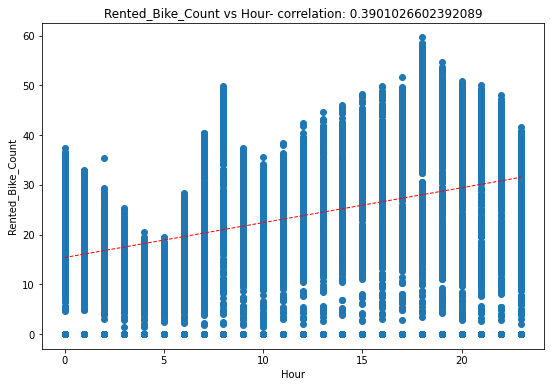

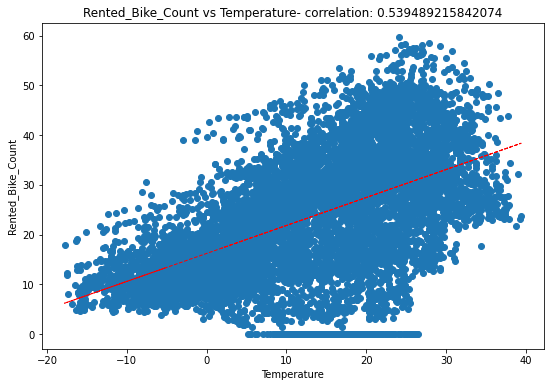

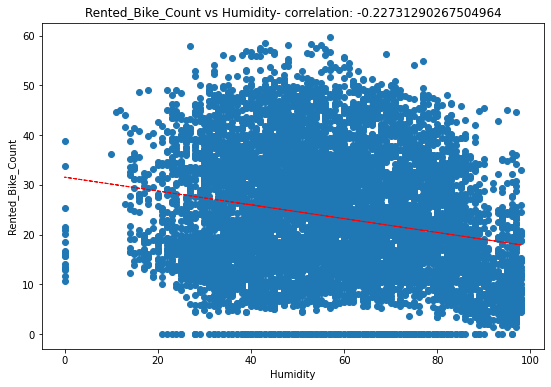

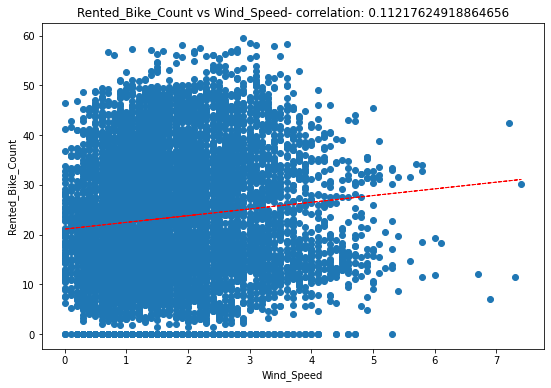

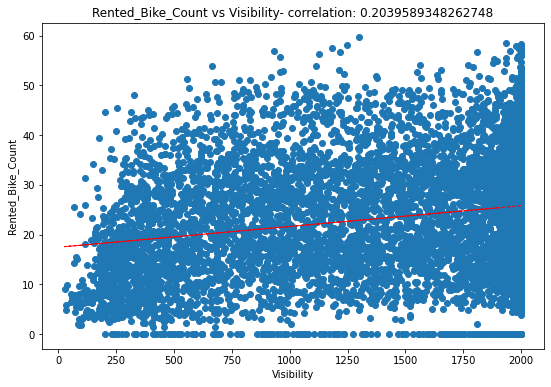

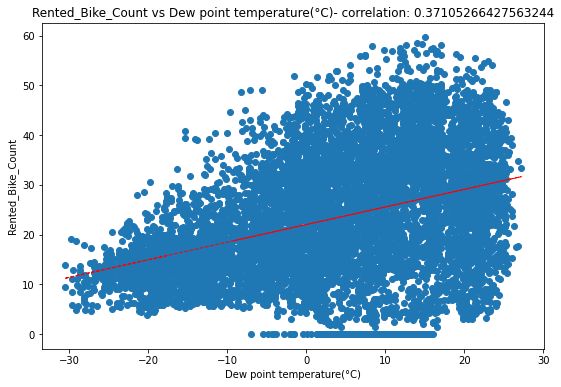

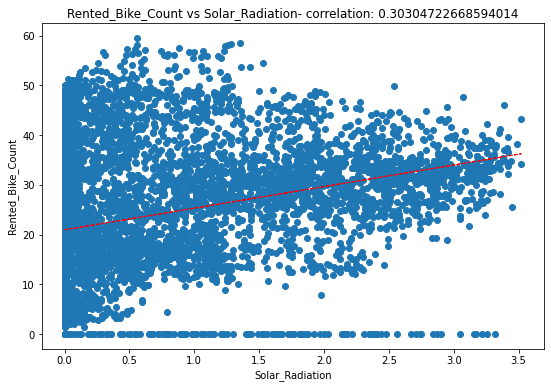

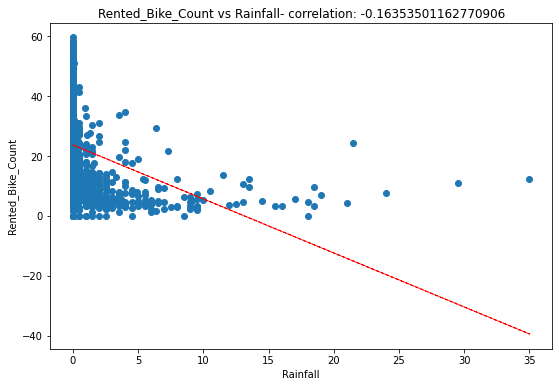

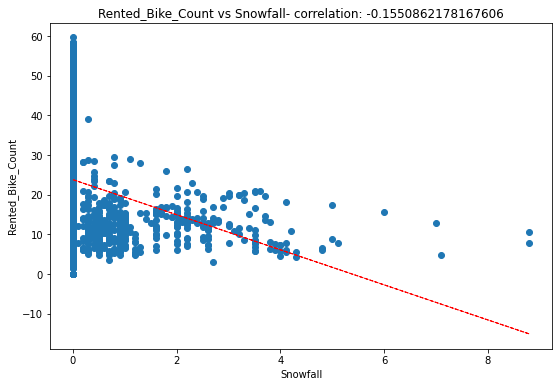

In [349]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['Rented_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented_Bike_Count')
    ax.set_title('Rented_Bike_Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

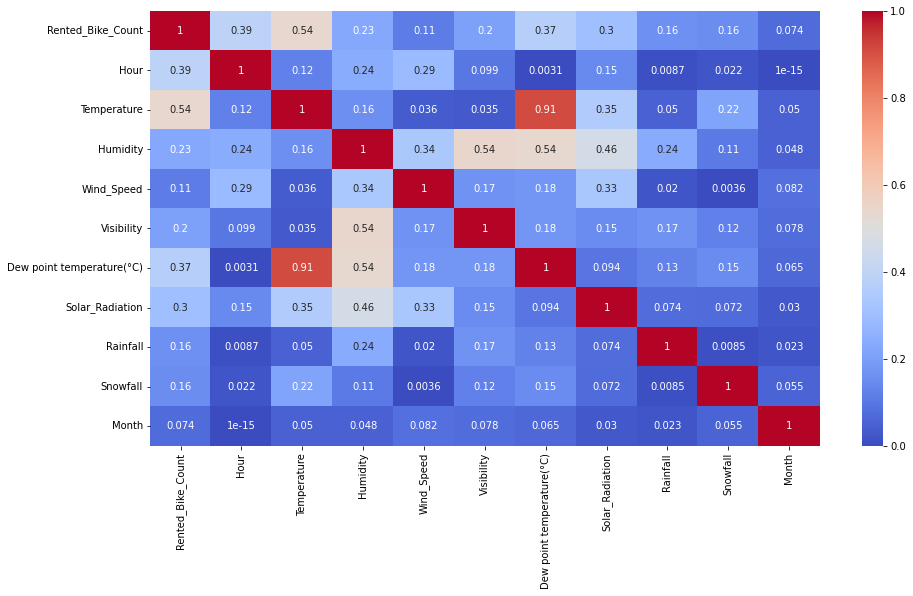

In [350]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Inference: Temperature and Dew Point Temperataure columns are highly correlated. 

In [351]:
data=data.drop(['Dew point temperature(°C)'],axis=1)

In [352]:
#number of unique values in all columns
data.nunique()

Date                  365
Rented_Bike_Count    2166
Hour                   24
Temperature           546
Humidity               90
Wind_Speed             65
Visibility           1789
Solar_Radiation       345
Rainfall               61
Snowfall               51
Seasons                 4
Holiday                 2
Functioning Day         2
Month                  12
dtype: int64

we need to label encode the categorical values of the columns Seasons and Holiday and drop the Functioning day column as it is very much correlated to Holiday column

In [353]:
data=data.drop('Functioning Day', axis=1)

In [354]:
data.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [355]:
data.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [356]:
data['Seasons'] = data['Seasons'].map({'Winter':0,'Spring':1,'Summer':2,'Autumn':3})
data['Holiday'] = data['Holiday'].map({'No Holiday':0,'Holiday':1})

In [357]:
data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Month
0,01-12-2017,15.937377,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1
1,01-12-2017,14.282857,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1
2,01-12-2017,13.152946,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1
3,01-12-2017,10.344080,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1
4,01-12-2017,8.831761,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1


We can also drop the Date column as we want to predict the demand for bikes on hourly basis based on the conditions

In [358]:
data=data.drop(['Date'],axis=1)

In [359]:
data.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Month
0,15.937377,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1
1,14.282857,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1
2,13.152946,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1
3,10.344080,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1
4,8.831761,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1


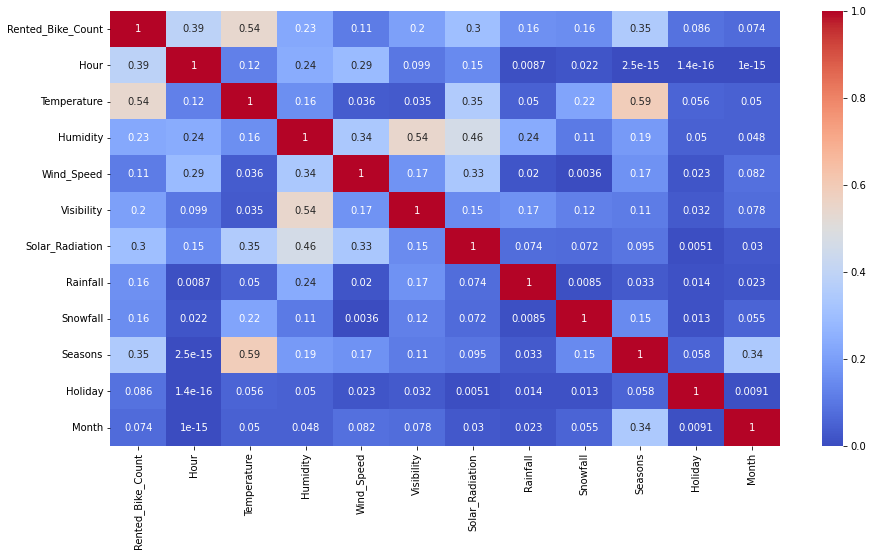

In [360]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [361]:
#checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [362]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Hour,3.967912
1,Temperature,4.579118
2,Humidity,6.103069
3,Wind_Speed,4.693856
4,Visibility,5.540314
5,Solar_Radiation,2.272350
6,Rainfall,1.081306
7,Snowfall,1.127711
8,Seasons,5.480857
9,Holiday,1.056367


In [363]:
data = data.reset_index()

# **Prediction**

In [364]:
data_pred = data.copy()

In [365]:
# Get one hot encoding of columns Seasons
#one_hot = pd.get_dummies(data_pred['Seasons'])
# Drop column Seasons as it is now encoded
#data_pred = data_pred.drop('Seasons',axis = 1)
# Join the encoded data_pred
#data_pred = data_pred.join(one_hot)

In [366]:
data_pred.head()

,index,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Month
0,0,15.937377,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1
1,1,14.282857,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1
2,2,13.152946,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1
3,3,10.344080,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1
4,4,8.831761,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1


In [367]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              8760 non-null   int64  
 1   Rented_Bike_Count  8760 non-null   float64
 2   Hour               8760 non-null   int64  
 3   Temperature        8760 non-null   float64
 4   Humidity           8760 non-null   int64  
 5   Wind_Speed         8760 non-null   float64
 6   Visibility         8760 non-null   int64  
 7   Solar_Radiation    8760 non-null   float64
 8   Rainfall           8760 non-null   float64
 9   Snowfall           8760 non-null   float64
 10  Seasons            8760 non-null   int64  
 11  Holiday            8760 non-null   int64  
 12  Month              8760 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 889.8 KB


In [368]:
features=list(data_pred.columns.values.tolist())
features

['index',
 'Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_Speed',
 'Visibility',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Month']

In [369]:
data_pred.isnull().any().any()

False

In [370]:
data_pred.isnull().any()

index                False
Rented_Bike_Count    False
Hour                 False
Temperature          False
Humidity             False
Wind_Speed           False
Visibility           False
Solar_Radiation      False
Rainfall             False
Snowfall             False
Seasons              False
Holiday              False
Month                False
dtype: bool

In [371]:
data_pred.describe()

,index,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,4379.500000,23.443395,11.500000,12.882922,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068,1.504110,0.049315,6.526027
std,2528.938512,12.450984,6.922582,11.944825,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746,1.114408,0.216537,3.448048
min,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2189.750000,13.820275,5.750000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000
50%,4379.500000,22.461075,11.500000,13.700000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000,2.000000,0.000000,7.000000
75%,6569.250000,32.638167,17.250000,22.500000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000,2.000000,0.000000,10.000000
max,8759.000000,59.632206,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000,3.000000,1.000000,12.000000


In [372]:

#y to contain only target variable
y=data_pred.pop('Rented_Bike_Count')

#X is all remainign variable also our independent variables
X=data_pred

In [373]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state = 0)

In [374]:
import sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)

# Use the model to predict the test data
y_pred = regr.predict(X_test)

# Form residual
resid = y_test - y_pred

In [375]:
#get the X_train and X-test value
y_pred_train=regr.predict(X_train)
y_pred_test=regr.predict(X_test)

In [376]:
#Root Mean Squared Error
RMSE = np.sqrt(np.mean(resid**2))
print('The Root Mean Squared Error is',RMSE)
print()

# Mean Absolute Error
MAE = np.mean(np.abs(resid))
print('The Mean Absolute Error is',MAE)
print()

#Rsquared
R2 = r2_score(y_test, y_pred)
print('The Rsquared value is',R2)

Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

The Root Mean Squared Error is 8.968537875645389

The Mean Absolute Error is 6.524784008802254

The Rsquared value is 0.4763302472434906
Adjusted R2 : 0.4923752480612964


# **Model 2**

In [377]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [378]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [379]:
#check the score
ridge.score(X_train, y_train)

0.494694050614621

In [380]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [381]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)





#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 78.60160783439586
RMSE : 8.86575478086304
R2 : 0.494694050614621
Adjusted R2 : 0.4923752470227952


# Model 3

In [382]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.4641111761822482 0.47758119328728343


In [383]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [384]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)



from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 81.2635557141021
RMSE : 9.014630093026673
R2 : 0.47758119328728343
Adjusted R2 : 0.4751838603310492


## Model 4

In [385]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [386]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [387]:
#check the score
elasticnet.score(X_train, y_train)

0.49085420454563566

In [388]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [389]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)




#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 79.19890552152174
RMSE : 8.899376692865728
R2 : 0.49085420454563566
Adjusted R2 : 0.4885177802452715
